In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
final_ames_df$X <- NULL
head(final_ames_df)
t(dim(final_ames_df))

MSSubClass.20,MSSubClass.30,MSSubClass.40,MSSubClass.45,MSSubClass.50,MSSubClass.60,MSSubClass.70,MSSubClass.75,MSSubClass.80,MSSubClass.85,⋯,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageYrBlt,GarageArea
-0.760586,-0.2233679,-0.05255887,-0.09128733,-0.3318133,1.9746741,-0.2076167,-0.1055563,-0.2021419,-0.1181804,⋯,-0.1316206,1.0509849,0.8820760,0.7205018,0.08917398,0.10842138,-0.8026317,0.5315369,1.02265460,0.2771098
1.313870,-0.2233679,-0.05255887,-0.09128733,-0.3318133,-0.5060637,-0.2076167,-0.1055563,-0.2021419,-0.1181804,⋯,0.1149991,0.1692304,-0.4188065,0.7552734,0.20492237,0.22641726,0.4214040,-0.3785471,-0.09204807,0.2390487
-0.760586,-0.2233679,-0.05255887,-0.09128733,-0.3318133,1.9746741,-0.2076167,-0.1055563,-0.2021419,-0.1181804,⋯,0.4215520,0.9860786,0.8342087,0.6806608,0.28181796,0.13033862,-0.5752722,0.6618057,0.94060083,0.2997008
-0.760586,-0.2233679,-0.05255887,-0.09128733,-0.3318133,-0.5060637,4.8132480,-0.1055563,-0.2021419,-0.1181804,⋯,0.1049061,-1.8680714,-0.7103048,0.5941378,0.32144248,0.07065950,-0.4377884,0.5437750,0.81736628,0.3115320
-0.760586,-0.2233679,-0.05255887,-0.09128733,-0.3318133,1.9746741,-0.2076167,-0.1055563,-0.2021419,-0.1181804,⋯,0.8798018,0.9536011,0.7384023,0.7125017,0.30382402,0.19684307,0.1146148,1.2836237,0.89954319,0.3689426
-0.760586,-0.2233679,-0.05255887,-0.09128733,3.0116663,-0.5060637,-0.2076167,-0.1055563,-0.2021419,-0.1181804,⋯,0.8600478,0.7258029,0.4984665,0.7243605,-0.06527209,0.08633152,-1.0317819,-0.1501048,0.61156359,0.2483025


1451,402


In [3]:
install.packages('mlbench')
library(mlbench)
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice


In [4]:
set.seed(42)

In [5]:
final_ames_df$SalePrice <- sale_price

In [6]:
train_index <- (createDataPartition(final_ames_df$SalePrice, p =0.6, list=FALSE, times=1))


In [35]:
train = final_ames_df[train_index,]
validate = final_ames_df[-train_index,]
write.csv(train, "train.csv")
write.csv(validate, "validate.csv")

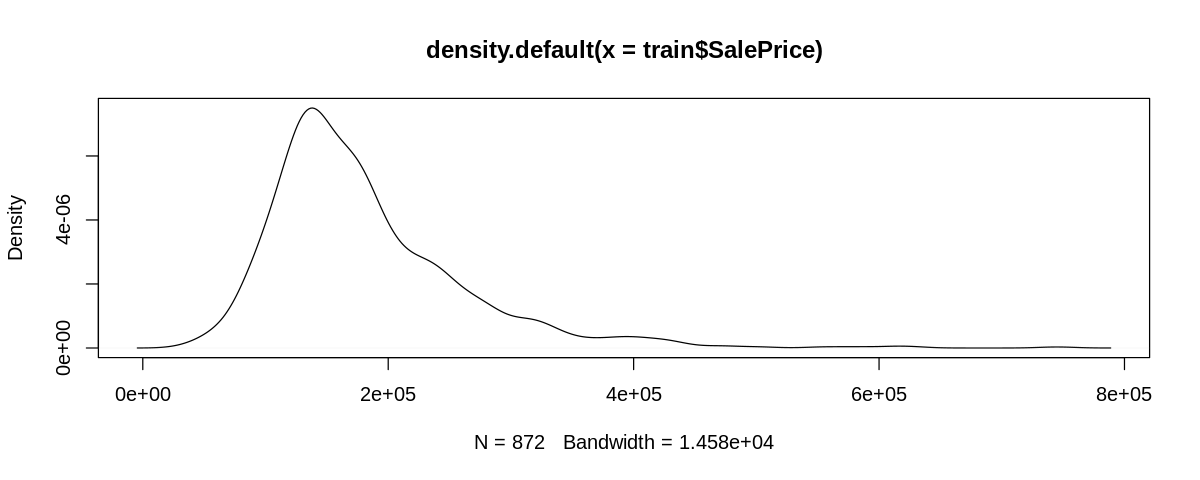

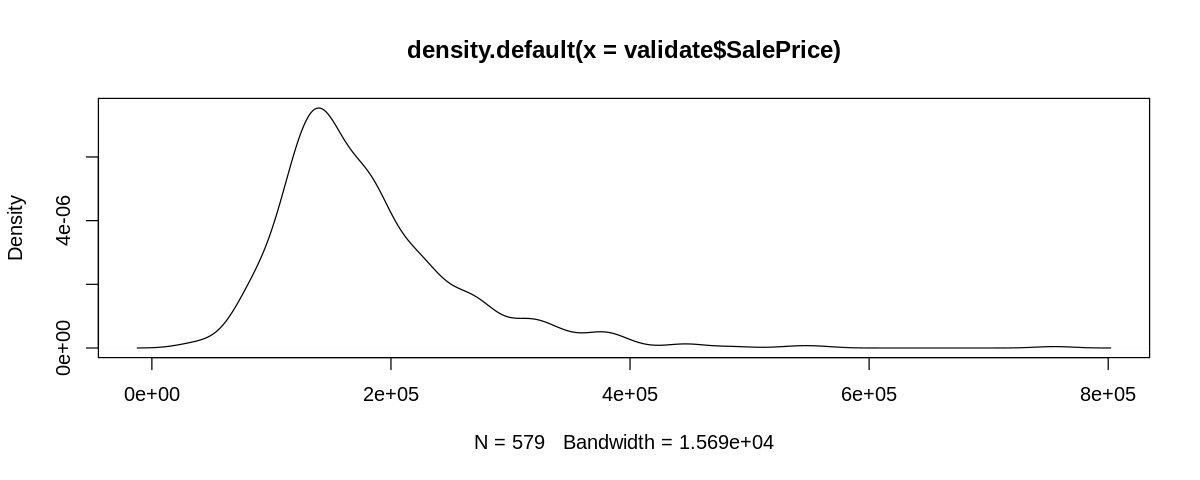

In [8]:
plot(density(train$SalePrice))
plot(density(validate$SalePrice))

### Variable Ranking by Recursive Feature Elimination

In [9]:
install.packages('Hmisc')
install.packages('randomForest')

also installing the dependencies ‘backports’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’

Warning message in install.packages("Hmisc"):
“installation of package ‘viridis’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library(Hmisc)
library(randomForest)

ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [11]:
normalization <- preProcess(ames)
subsets <- c(1:5, 10, 15, 20, 25)

In [21]:
ctrl <- rfeControl(functions = lmFuncs,
                   method = "repeatedcv",
                   repeats = 10,
                   verbose = FALSE)

In [23]:
options(warn=-1)

In [24]:
lmProfile <- rfe(train[,1:401], train$SalePrice,
                 sizes = subsets,
                 rfeControl = ctrl)

In [26]:
options(warn=0)
lmProfile


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 10 times) 

Resampling performance over subset size:

 Variables  RMSE Rsquared RMSESD RsquaredSD Selected
         1 79183  0.01825  11610    0.02423         
         2 77023  0.05915  11602    0.03403         
         3 77023  0.05915  11599    0.03401         
         4 76613  0.06954  11615    0.03724         
         5 75362  0.10238  11428    0.04172         
        10 70945  0.21071  10912    0.06855         
        15 69654  0.23966  11116    0.06657         
        20 68799  0.25915  11392    0.06673         
        25 67732  0.28184  11307    0.06450         
       401 38514  0.78734  11277    0.10823        *

The top 5 variables (out of 401):
   BsmtQual.TA, BsmtQual.Gd, BsmtQual.Ex, BsmtFinSF1, TotalBsmtSF


In [17]:
library(broom)

In [18]:
lmRating <- lm(train$SalePrice ~ ., data=train)
lmCoefs <- tidy(lmRating)
head(lmCoefs)

term,estimate,std.error,statistic,p.value
(Intercept),180540.3370,806.3771,223.8907136,0.0000000
MSSubClass.20,-3723.4589,16782.3701,-0.2218673,0.8244977
MSSubClass.30,-2242.1117,7566.3340,-0.2963273,0.7670894
MSSubClass.40,324.5651,2579.3720,0.1258311,0.8999106
MSSubClass.45,1688.8568,5066.6282,0.3333295,0.7390097
MSSubClass.50,-4560.4927,10829.9323,-0.4211008,0.6738422


In [20]:
lmCoefs$abs_est <- abs(lmCoefs$estimate)
lmCoefsAbs <- lmCoefs[-c(2:5)]
lmCoefsAbs <- lmCoefsAbs[-1,]
head(lmCoefsAbs[order(-lmCoefsAbs$abs_est), ], 10)

,term,abs_est
151,BsmtQual.TA,186236.21
150,BsmtQual.Gd,183588.74
148,BsmtQual.Ex,98065.43
305,TotalBsmtSF,60474.94
303,BsmtFinSF1,57546.67
149,BsmtQual.Fa,56442.85
160,BsmtFinType1.GLQ,49360.06
225,GarageType.Attchd,48998.68
229,GarageType.Detchd,44293.77
158,BsmtFinType1.ALQ,40669.10


In [32]:
top_ten_df <- data.frame(train$BsmtQual.TA,
                         train$BsmtQual.Gd,
                         train$BsmtQual.Ex,
                         train$TotalBsmtSF,
                         train$BsmtFinSF1,
                         train$BsmtQual.Fa,
                         train$BsmtFinType1.GLQ,
                         train$GarageType.Attchd,
                         train$GarageType.Detchd,
                         train$BsmtFinType1.ALQ,
                         train$SalePrice)

In [33]:
write.csv(top_ten_df, "top_ten_df.csv")